<a href="https://colab.research.google.com/github/fadillarizalul/tabular-playground-series/blob/main/Kaggle_TPS_Feb_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download tabular-playground-series-feb-2022

 86% 76.0M/88.1M [00:00<00:00, 182MB/s]
100% 88.1M/88.1M [00:00<00:00, 178MB/s]
 98% 174M/178M [00:01<00:00, 182MB/s]
100% 178M/178M [00:01<00:00, 166MB/s]
  0% 0.00/255k [00:00<?, ?B/s]
100% 255k/255k [00:00<00:00, 145MB/s]


In [6]:
! unzip /content/train.csv.zip
! unzip /content/test.csv.zip
! unzip /content/sample_submission.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score, plot_roc_curve, auc, mean_squared_error, accuracy_score

In [8]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
submission_sample = pd.read_csv('/content/sample_submission.csv')

In [9]:
train_data

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,-9.536743e-07,-9.536743e-06,-8.583069e-05,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,...,-0.002403,0.008798,-0.001202,0.009760,-0.000200,-0.000801,-0.001202,-0.000801,-2.002716e-04,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,-0.000343,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,-9.536743e-07,-9.536743e-06,-8.583069e-05,-0.000343,0.000199,-0.000202,0.001798,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,0.001798,-0.000403,0.001996,0.003597,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.000403,0.002995,0.002995,0.000597,0.001199,-0.000114,-0.000200,...,0.000597,0.002798,0.001798,0.000760,-0.000200,-0.000801,-0.000202,-0.000801,7.997284e-04,0.000199,0.003597,0.001597,-0.000801,-0.000202,-0.001403,0.000798,0.001199,0.001199,0.000800,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,0.001313,0.000657,0.001657,0.001657,0.000886,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,4.632568e-08,-3.536743e-06,1.693115e-07,0.000008,0.000366,0.000766,0.000937,0.000632,0.000101,-0.000021,-0.000008,8.465576e-08,-0.000080,0.000114,0.000710,0.001307,0.001065,0.000375,-0.000017,-0.000017,-0.000014,-0.000094,0.000183,0.000817,0.000968,0.000469,-0.000007,-0.000017,-0.000031,...,-0.000031,0.000146,0.000118,0.000156,0.000003,0.000080,0.000219,0.000225,1.672839e-05,0.000014,0.000319,0.000355,0.000175,0.000030,0.000347,0.000229,0.000203,0.000238,0.000120,0.000027,0.000097,0.000159,0.000070,0.000138,0.000315,0.000214,0.000178,0.000296,0.000118,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,-9.536743e-07,-9.536743e-06,-1.783069e-05,0.000068,0.000722,0.001594,0.001913,0.001111,0.000247,-0.000047,-0.000010,-1.891534e-05,-0.000138,0.000161,0.001345,0.002526,0.002155,0.000754,-0.000029,-0.000025,-0.000034,-0.000179,0.000345,0.001427,0.001964,0.000861,-0.000038,-0.000050,-0.000067,...,-0.000075,0.000284,0.000251,0.000296,-0.000020,0.000194,0.000399,0.000407,3.972839e-05,0.000058,0.000505,0.000784,0.000296,0.000128,0.000835,0.000445,0.000401,0.000412,0.000246,0.000047,0.000160,0.000309,0.000129,0.000243,0.000597,0.000428,0.000363,0.000472,0.000197,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-9.536743e-06,-0

In [10]:
train_data.shape

(200000, 288)

In [11]:
train_data.describe()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,99999.500000,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,-7.498743e-07,0.000021,-0.000055,-0.000162,-0.000185,-0.000141,0.000142,-0.000092,-0.000100,-0.000053,-0.000008,-0.000026,-0.000216,-0.000462,-0.000554,-0.000265,-0.000296,-0.000302,-0.000150,-0.000027,-0.000055,-0.000418,-0.000825,-0.000761,-0.000704,-0.000600,-0.000196,-0.000056,-0.000074,...,0.004902,0.002171,0.004145,0.002231,0.003025,0.000045,0.000240,0.000586,0.000464,0.000210,0.000458,0.001835,0.001989,0.000822,0.001292,0.002505,0.001791,0.001693,0.001998,0.000853,0.000116,0.000445,0.000577,0.000287,0.000647,0.001469,0.001173,0.001035,0.001394,0.000671,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,57735.171256,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,5.140499e-06,0.000165,0.000116,0.000665,0.001375,0.002061,0.002193,0.001524,0.000760,0.000157,0.000013,0.000093,0.000469,0.001172,0.002358,0.003221,0.002652,0.001545,0.000688,0.000201,0.000303,0.000824,0.001848,0.003175,0.003130,0.002097,0.000990,0.000343,0.000507,...,0.007141,0.004343,0.005278,0.003982,0.004298,0.000774,0.001676,0.002131,0.001883,0.001017,0.001858,0.003521,0.003852,0.002275,0.002977,0.004863,0.003363,0.003309,0.003535,0.002165,0.000780,0.001517,0.001618,0.001102,0.001814,0.002874,0.002159,0.002281,0.002648,0.001711,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,0.000000,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,...,-0.004807,-0.002403,-0.001202,-0.001202,-0.000240,-0.000200,-0.000801,-0.001202,-0.000801,-0.000200,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.000

In [12]:
test_data

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,-9.536743e-07,-0.000003,-0.000017,-0.000074,0.000038,0.000068,0.000164,0.000180,-0.000003,-0.000025,-0.000009,0.000004,-0.000101,-0.000171,0.000006,0.000330,0.000580,0.000228,-0.000015,-0.000016,-0.000026,-0.000146,-0.000075,0.000212,0.000565,0.000359,0.000072,-0.000005,-0.000043,...,0.000163,0.000105,0.000178,0.000151,0.000156,5.572839e-05,0.000258,0.000321,0.000204,0.000006,0.000180,0.000540,0.000490,0.000174,0.000175,0.000447,0.000262,0.000279,0.000254,0.000111,0.000043,0.000150,0.000192,0.000076,0.000191,0.000387,0.000214,0.000184,0.000268,0.000121,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,0.001199,0.001798,0.000798,0.000199,0.000657,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,0.001597,0.002996,-0.002403,0.000798,-0.000343,-0.000043,-0.000114,-0.000801,0.003597,0.001995,0.002995,-0.000403,0.001199,-0.000114,-0.000200,...,-0.002807,0.000597,0.000798,0.001798,0.000760,-2.002716e-04,0.000199,0.001798,0.000199,-0.000200,-0.000801,0.000597,-0.000403,0.000199,-0.001202,0.000597,0.001798,0.000199,0.001199,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,0.002657,-0.000343,-0.000343,-0.000114,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,-9.536743e-07,-0.000003,-0.000003,-0.000045,-0.000038,-0.000110,-0.000127,-0.000076,-0.000012,-0.000004,-0.000005,0.000009,-0.000052,-0.000110,-0.000280,-0.000220,-0.000165,-0.000048,-0.000023,-0.000005,-0.000006,-0.000073,-0.000154,-0.000332,-0.000287,-0.000172,-0.000035,0.000006,-0.000007,...,0.000699,0.000423,0.000300,0.000281,0.000104,3.172839e-05,0.000097,0.000247,0.000162,0.000073,0.000156,0.000623,0.000478,0.000213,0.000264,0.000560,0.000420,0.000304,0.000329,0.000112,0.000039,0.000142,0.000155,0.000080,0.000177,0.000428,0.000250,0.000251,0.000338,0.000122,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,4.632568e-08,-0.000006,-0.000024,0.000060,0.000712,0.001579,0.001887,0.001299,0.000203,-0.000041,-0.000009,-0.000016,-0.000128,0.000128,0.001283,0.002351,0.002028,0.000670,-0.000037,-0.000025,-0.000063,-0.000171,0.000338,0.001279,0.001807,0.000838,0.000039,-0.000053,-0.000068,...,-0.000282,-0.000026,0.000226,0.000190,0.000284,7.283936e-07,0.000168,0.000405,0.000378,0.000037,0.000044,0.000462,0.000797,0.000306,0.000091,0.000766,0.000449,0.000417,0.000425,0.000222,0.000049,0.000185,0.000304,0.000134,0.000204,0.000635,0.000431,0.000317,0.000460,0.000215,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,-0.000801,-0.001

In [13]:
test_data.shape

(100000, 287)

In [14]:
test_data.describe()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,249999.500000,6.635157e-07,-0.000002,-0.000017,-0.000009,0.000002,2.737423e-05,0.000020,-0.000016,-0.000024,-0.000008,-5.478143e-07,0.000021,-0.000054,-0.000172,-0.000205,-0.000157,0.000128,-0.000103,-0.000092,-0.000049,-0.000008,-0.000025,-0.000210,-0.000479,-0.000558,-0.000301,-0.000330,-0.000315,-0.000153,-0.000029,-0.000051,-0.000406,-0.000821,-0.000783,-0.000751,-0.000627,-0.000176,-0.000053,-0.000073,...,0.004921,0.002262,0.004135,0.002265,0.003039,0.000052,0.000262,0.000605,0.000459,0.000186,0.000457,0.001903,0.002013,0.000812,0.001343,0.002523,0.001834,0.001738,0.002041,0.000869,0.000149,0.000461,0.000581,0.000304,0.000629,0.001512,0.001193,0.001052,0.001434,0.000677,0.000133,0.000364,0.000273,0.000464,0.000603,0.000392,0.000060,9.343461e-05,1.198191e-04,-2.913643e-07
std,28867.657797,7.491726e-05,0.000158,0.000254,0.000443,0.000664,8.727759e-04,0.000830,0.000389,0.000189,0.000013,1.151934e-05,0.000162,0.000148,0.000584,0.001308,0.002033,0.002188,0.001493,0.000808,0.000236,0.000080,0.000153,0.000479,0.001125,0.002375,0.003182,0.002616,0.001522,0.000642,0.000161,0.000379,0.000876,0.001871,0.003138,0.003105,0.002045,0.001074,0.000354,0.000526,...,0.007054,0.004462,0.005249,0.004114,0.004295,0.000780,0.001740,0.002116,0.001874,0.000958,0.001895,0.003545,0.003839,0.002225,0.003028,0.004851,0.003409,0.003329,0.003624,0.002172,0.000917,0.001525,0.001579,0.001145,0.001760,0.002908,0.002179,0.002328,0.002735,0.001665,0.000696,0.001167,0.001003,0.001185,0.001547,0.001200,0.000444,5.778425e-04,6.757833e-04,1.313731e-05
min,200000.000000,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-2.403259e-04,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,...,-0.004807,-0.002403,-0.001202,-0.001202,-0.000240,-0.000200,-0.000801,-0.001202,-0.000801,-0.000200,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.00080

In [15]:
train_data.isna().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 288, dtype: int64

In [16]:
test_data.isna().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A8T2G0C0     0
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
Length: 287, dtype: int64

In [17]:
train_data.duplicated().any()

False

In [18]:
test_data.duplicated().any()

False

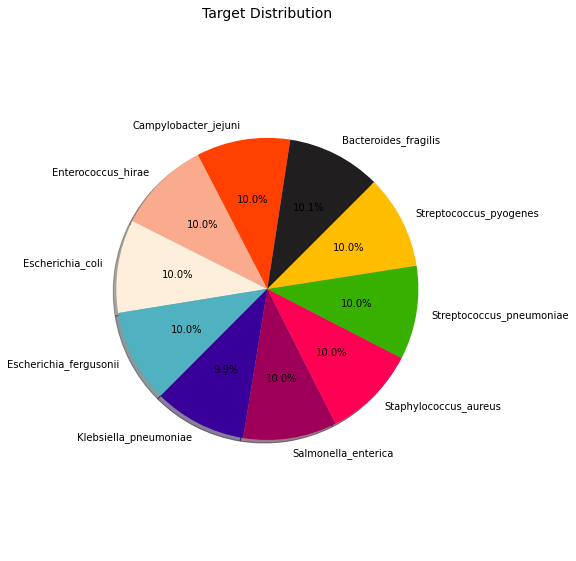

In [19]:
# Create a plot to show label distribution
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
g = train_data['target'].value_counts(normalize=True).sort_index()

colors = ["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0",
          "#390099","#9e0059","#ff0054","#38B000","#ffbd00"]

ax1.pie(g.values, labels=g.index, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=45)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('Target Distribution', fontsize=14)
plt.tight_layout()
plt.show()

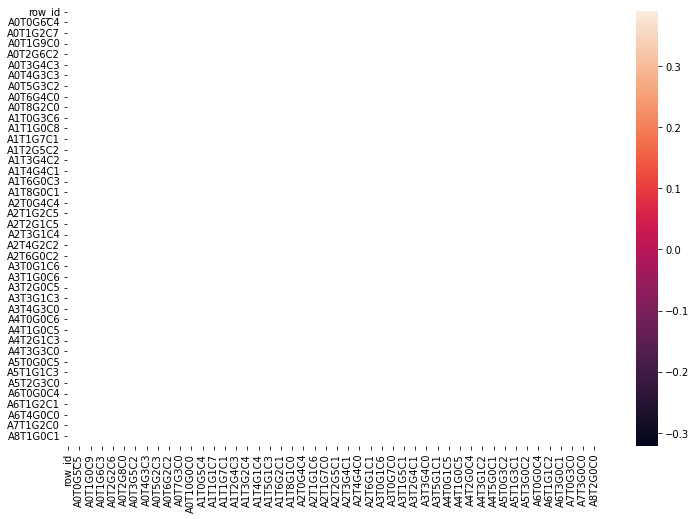

In [20]:
# Heatmap
plt.figure(figsize = (12,8))
mask = np.triu(np.ones_like(train_data.corr(), dtype = bool))
sns.heatmap(train_data.corr(), linewidths = .6, mask = mask, robust = True)

In [21]:
# splitting into train and validation set
# cross-validation could also be used if the dataset is limited
train_x, val_x, train_y, val_y = train_test_split(train_data.drop(columns='target'), 
                                                  train_data['target'],
                                                  test_size=0.20, 
                                                  random_state=69)

# Modelling

In [22]:
rf = RandomForestClassifier(random_state=44)
rf.fit(train_x, train_y)
pred_rf = rf.predict(val_x)

print('RandomForestClassifier Accuracy:', accuracy_score(val_y, pred_rf))

RandomForestClassifier Accuracy: 0.993175


In [23]:
from sklearn.ensemble import ExtraTreesClassifier

xtc = ExtraTreesClassifier(n_estimators = 100, random_state = 69)
xtc.fit(train_x, train_y)
pred_xtc = xtc.predict(val_x)

print('ExtraTreesClassifier Accuracy:', accuracy_score(val_y, pred_xtc))

ExtraTreesClassifier Accuracy: 0.993275


In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pred_dtc = dtc.predict(val_x)

print('DecisionTreeClassifier Accuracy:', accuracy_score(val_y, pred_dtc))

DecisionTreeClassifier Accuracy: 0.974275


In [25]:
'''
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(train_x, train_y)
pred_svc = svc.predict(val_x)

print('SVC Accuracy:', accuracy_score(val_y, pred_svc))
'''

"\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\nsvc = make_pipeline(StandardScaler(), SVC(gamma='auto'))\nsvc.fit(train_x, train_y)\npred_svc = svc.predict(val_x)\n\nprint('SVC Accuracy:', accuracy_score(val_y, pred_svc))\n"

In [28]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
adab.fit(train_x, train_y)
pred_adab = adab.predict(val_x)

print('AdaBoost Accuracy:', accuracy_score(val_y, pred_adab))

AdaBoost Accuracy: 0.355475


In [29]:
'''
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 44, n_estimators = 500, learning_rate = 0.01, eval_metric ="auc",
                      max_depth = 8, verbosity=0, tree_method = 'gpu_hist', task_type ="GPU")
xgb.fit(train_x, train_y)
pred_xgb = xgb.predict(val_x)

print('XGBClassifier Accuracy:', accuracy_score(val_y, pred_xgb))
'''

'\nimport xgboost as xgb\nfrom xgboost import XGBClassifier\n\nxgb = XGBClassifier(random_state = 44, n_estimators = 500, learning_rate = 0.01, eval_metric ="auc",\n                      max_depth = 8, verbosity=0, tree_method = \'gpu_hist\', task_type ="GPU")\nxgb.fit(train_x, train_y)\npred_xgb = xgb.predict(val_x)\n\nprint(\'XGBClassifier Accuracy:\', accuracy_score(val_y, pred_xgb))\n'

Prediction

In [30]:
xtc = ExtraTreesClassifier(n_estimators = 100, random_state = 69)
xtc.fit(train_x, train_y)
prediction = xtc.predict(test_data)

output = pd.DataFrame()
output['row_id'] = test_data['row_id']
output['target'] = prediction

In [31]:
#masukkin hasil ke format csv
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
